**Final Project Submission** 

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Bank Marketing Campaign

This project was completed as part of Flatiron School's Data Science Bootcamp (Module 3 Final Project).

## Introduction


### Problem Statement


In module 3 final project, a famous dataset 'Bank Marketing' is chosen to work on. The aim of this project is to predict the result of target variable by applying machine learning classification models. The bank marketing data is obtained from mobile marketing campaigns of a Portuguese banking institution.

Banks generally use telemarketing when targeting segments of customers to meet predefined objectives. Contact centers by centralizing customer remote interactions simplifies management of campaigns.

In this sense, Machine Learning algorithms by modeling available information and customer metrics gathered from customer centers can help focusing on maximizing customer lifetime value and decrease the time and costs of such campaigns.

## Business Value

### Methodology

We will adopt the OSEMN data science workflow, which involves:
1. Obtain (import the data)
2. Scrub (clean the data, deal with missing values and data types)
3. Explore (answer descriptives questions using EDA)
4. Model (build our predictive model)
5. iNterpret (comment on our model and findings)

### Obtain data

### Import Libraries

In [2]:
# Main libraries
import time
import pandas as pd
import numpy as np

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  
from pydotplus import graph_from_dot_data

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, recall_score
from sklearn.tree import export_graphviz
import xgboost as xgb

### Load Data

A dataset for this project has been provided and can be found in the `Data` folder in this repository.

Note that this exact dataset was found on <a href= 'https://www.kaggle.com/janiobachmann/bank-marketing-dataset'>Kaggle</a>. It is based on the dataset available from <a href = 'https://archive.ics.uci.edu/ml/datasets/Bank+Marketing'> UCI Machine Learning Repository</a>. 

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Let us begin by loading the data using Pandas.

In [3]:
# Obtaining the data and checking first five rows
df = pd.read_csv('data/bank.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

We see that we have 21 columns, with 20 feature columns and 1 target column. There are 41,188 observations recorded.

### Train test split

Before we proceed any further, let us split our data into test and training sets.

In [5]:
### NOTE for now do simple train-test split, but might want to think if need stratified split instead.

In [6]:

df.shape

(41188, 21)

In [7]:
# Checking for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



### Scrub the Data


In [9]:
# Frequency of values of each column
for col in df.columns:
    try:
        print(col, df[col].value_counts(normalize=True)[:10])
    except:
        print(col, df[col].value_counts(normalize=True))

    print('\n')

age 31    0.047271
32    0.044819
33    0.044503
36    0.043216
35    0.042707
34    0.042367
30    0.041614
37    0.035811
29    0.035277
39    0.034767
Name: age, dtype: float64


job admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
Name: job, dtype: float64


marital married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


education university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64


default no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


ho

In [10]:
# Cleaning column names
df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

It is observed that the target variable 'y' is imbalanced. It might cause a problem when applying classification models.

The data is already cleaned and there are no missing values. However, the unknown values will be treated as missing and dropped. Also, columns names and the values containing '.' will be cleaned.

### Missing values / Placeholder values

### Additional cleaning steps

In [11]:
# Cleaning the values in 'education' column
df['default'] = df['default'].replace('unknown', 'no')
df['education'] = df['education'].str.replace('.', '_')

In [12]:
# The unkown values in default column replaced with no
df['default'] = df['default'].replace('unknown', 'no')

In [13]:
# The unkown values replaced with None and then dropped
unknown_var_list = ['job','marital', 'education', 'loan', 'housing']

for col in unknown_var_list: 
    df[col] = df[col].replace('unknown', None)
    df[col] = df[col].dropna()

## Explore and Visualize Data

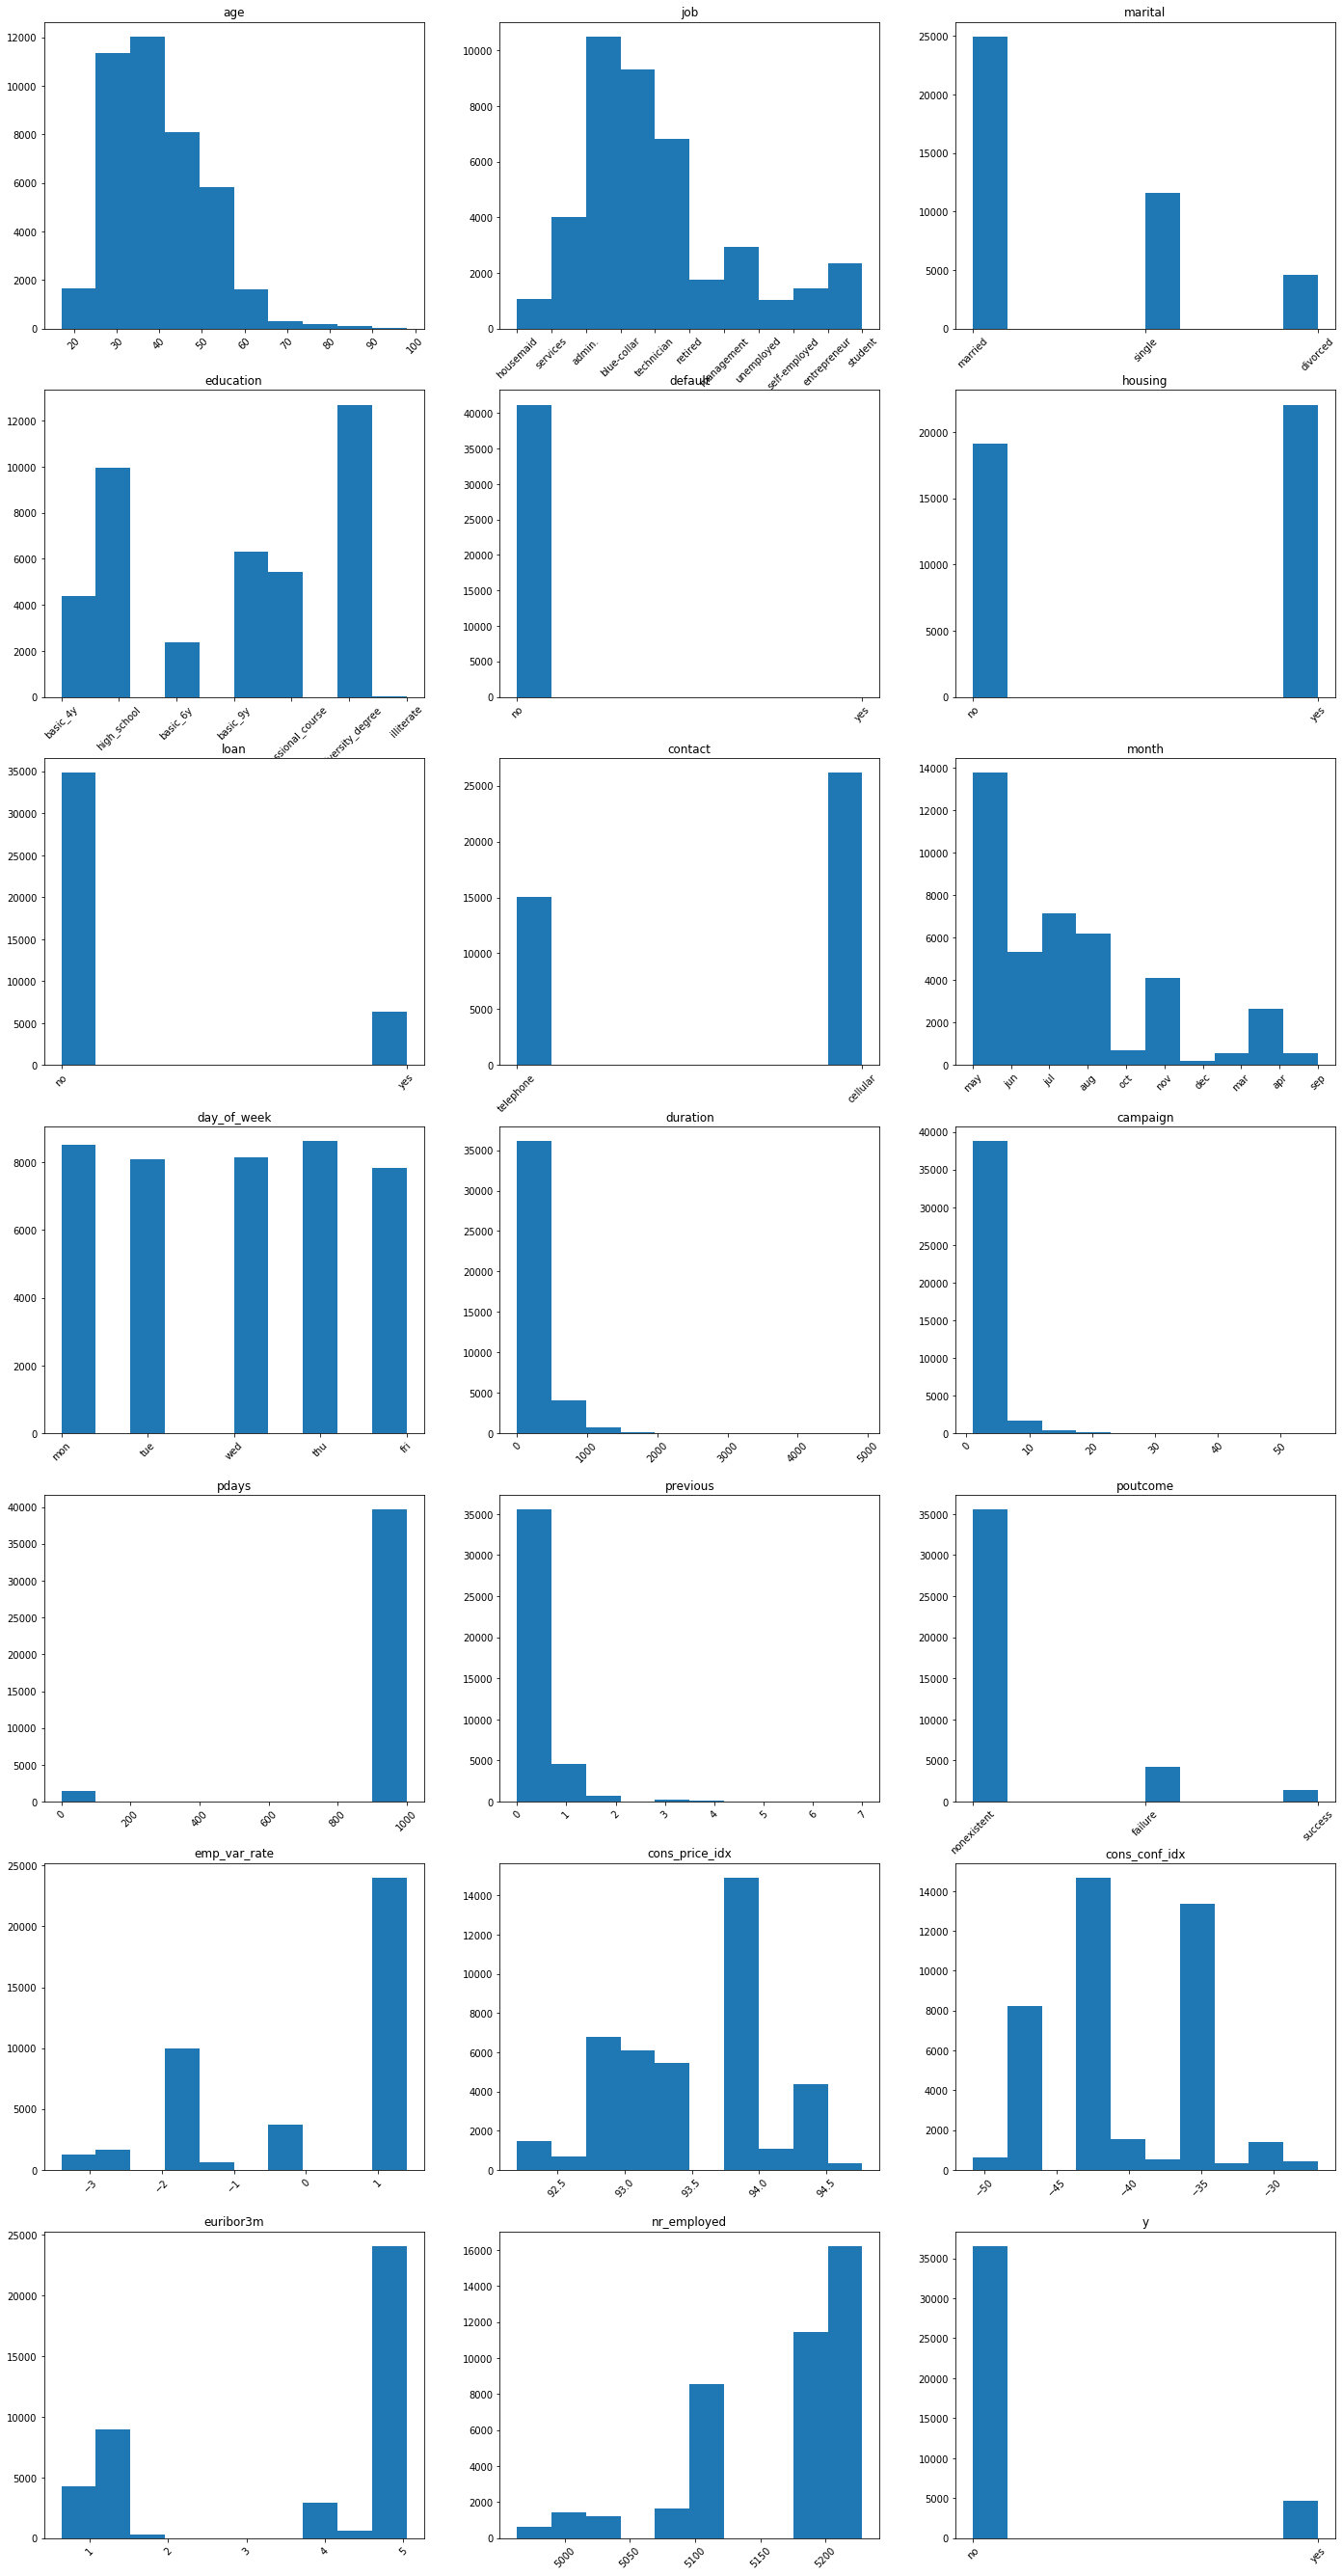

In [14]:
# Visualizing all the columns to see distributions
fig, axs = plt.subplots(7, 3, figsize=(24, 48))

counter = 0
for col in df.columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[col])    
    axs[trace_x, trace_y].set_title(col)
    
    counter += 1
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(45)

plt.show()


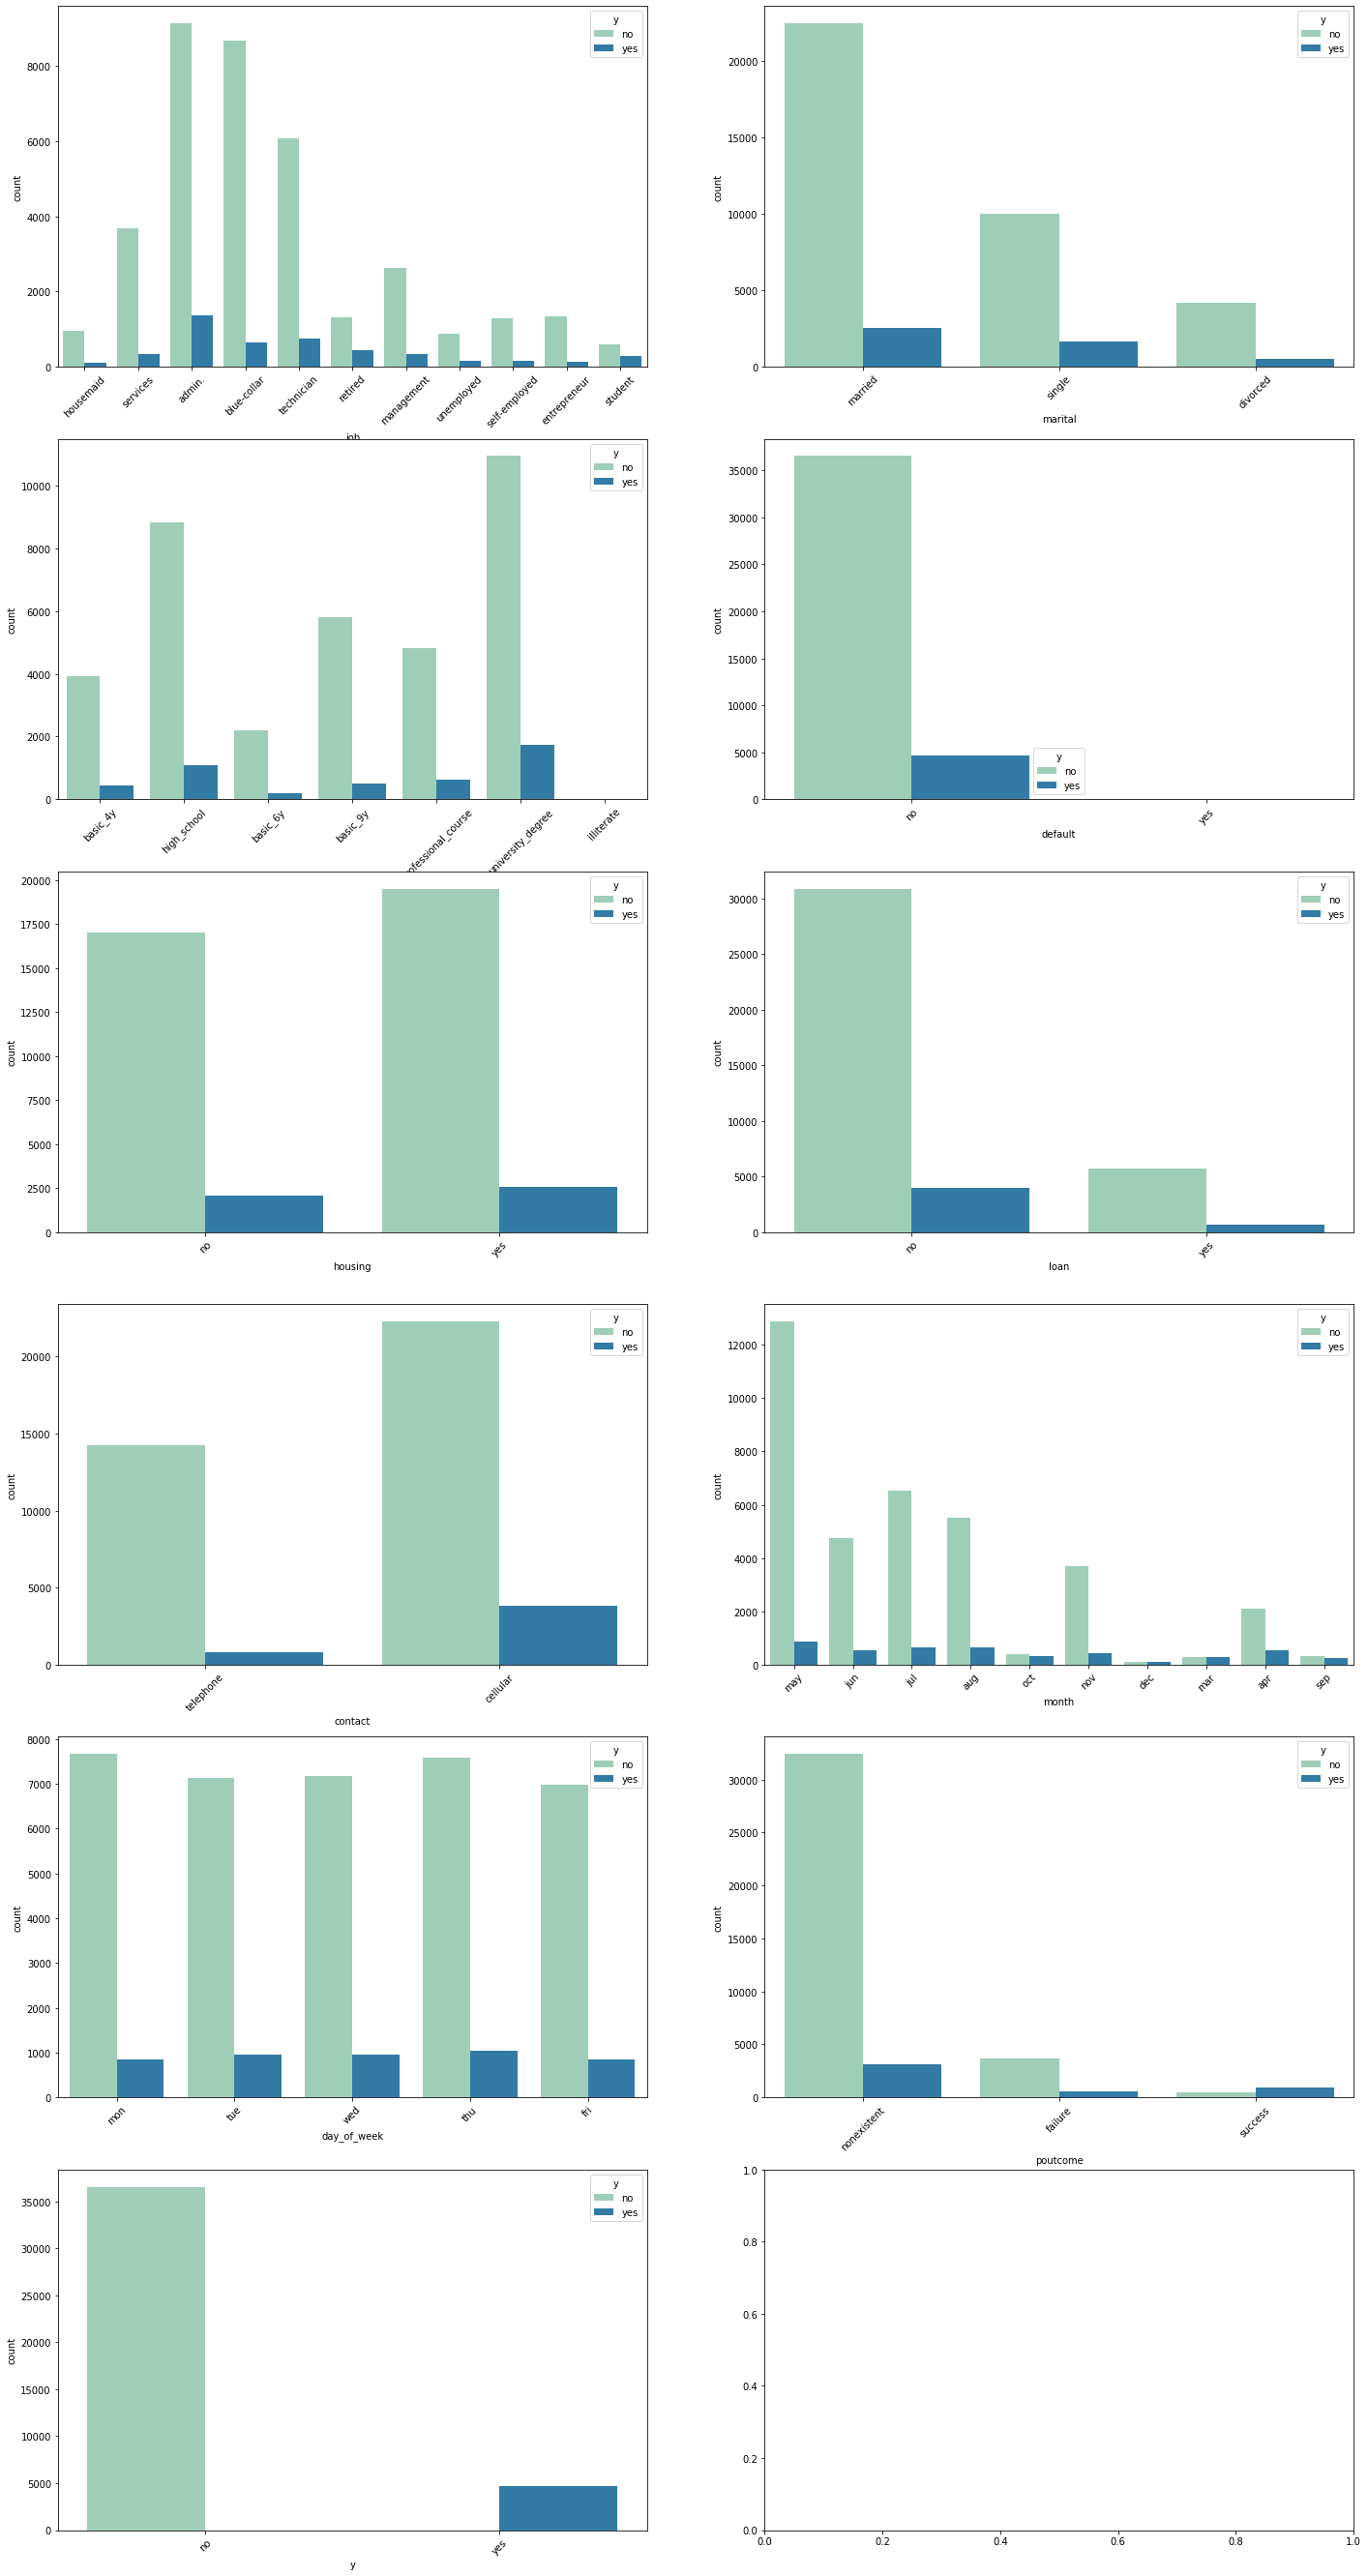

In [15]:
# Visualizing categorical columns with barplot
fig, ax = plt.subplots(6, 2, figsize=(24,48))
ax = ax.flatten()
for c, col in enumerate(df.select_dtypes('object')):
    sns.countplot(x=col, hue = df['y'], data=df, palette="YlGnBu", ax=ax[c])
    for tick in ax[c].get_xticklabels():
        tick.set_rotation(45)

### Target Variable

### Feature Variables

### EDA Q1

### EDA Q2

## Prepare Data for Modelling

### Feature Scaling

### Categorical Variable Encoding

## Modelling

### Choice of Evaluation Metric